**This file is for exploring the role of graph structure in the loss
\
\
The node feature is completely noisy, and regularizer parameter for graph is large

In [15]:
sys.path.append('/Users/liushuhan/Documents/AL_GNN/Experiments/RSP/Sythentic_graph')
sys.path.append('../')
from Generator import *
from util import *
from loss import *
from Estimator import *
from cluster import *
import matplotlib.pyplot as plt

### Star graph

In [16]:
G = nx.Graph()
subgraph = nx.star_graph(9)
subgraph = nx.relabel_nodes(subgraph, lambda x: x + G.number_of_nodes())
G.add_nodes_from(subgraph.nodes())
G.add_edges_from(subgraph.edges())
subgraph = nx.star_graph(9)
subgraph = nx.relabel_nodes(subgraph, lambda x: x + G.number_of_nodes())
G.add_nodes_from(subgraph.nodes())
G.add_edges_from(subgraph.edges())
subgraph = nx.star_graph(9)
subgraph = nx.relabel_nodes(subgraph, lambda x: x + G.number_of_nodes())
G.add_nodes_from(subgraph.nodes())
G.add_edges_from(subgraph.edges())
L, D, Gamma = graph_to_mat(G)

L, D, Gamma = graph_to_mat(G)
group_label = [0] * subgraph.number_of_nodes() + [1] * subgraph.number_of_nodes() + [3] * subgraph.number_of_nodes()
node_features = np.random.randn(G.number_of_nodes(), 30)

#### Unnormalized Lap matrix

Text(0.5, 1.0, 'asmmetric-asymmetric elastic net')

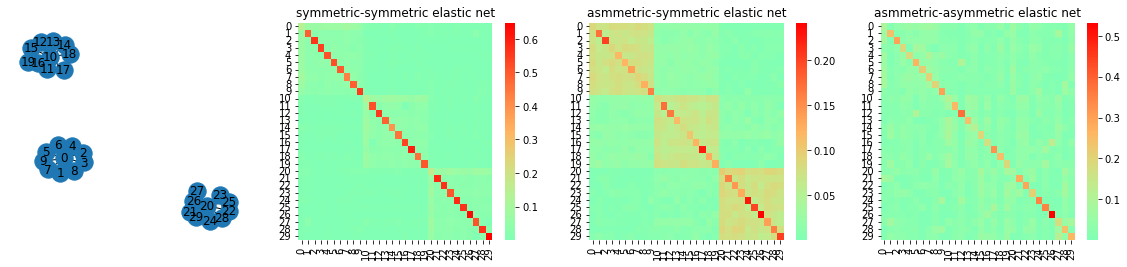

In [22]:
f = plt.figure(figsize=(20,4))
ax0 = f.add_subplot(1, 4, 1)
nx.draw(G, with_labels=True)
# symmetric-symmetric elastic net
sse = ss_El_Estimator(l1=10, l2=10, l3=20, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=False)
sse.fit(node_features, maxiter=500)
ax0 = f.add_subplot(1, 4, 2)
sse.scaling()
ax0.set_title('symmetric-symmetric elastic net')
# asmmetric-symmetric elastic net
ase = as_El_Estimator(l1=10, l2=10, l3=20, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=False)
ase.fit(node_features, maxiter=500)
ax1 = f.add_subplot(1, 4, 3)
ase.scaling()
ax1.set_title('asmmetric-symmetric elastic net')
# asmmetric-asymmetric elastic net
aae = aa_El_Estimator(l1=10, l2=10, l3=20, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=False)
aae.fit(node_features, maxiter=500)
ax2 = f.add_subplot(1, 4, 4)
aae.scaling()
ax2.set_title('asmmetric-asymmetric elastic net')


#### Normalized Lap matrix

Text(0.5, 1.0, 'asmmetric-asymmetric elastic net')

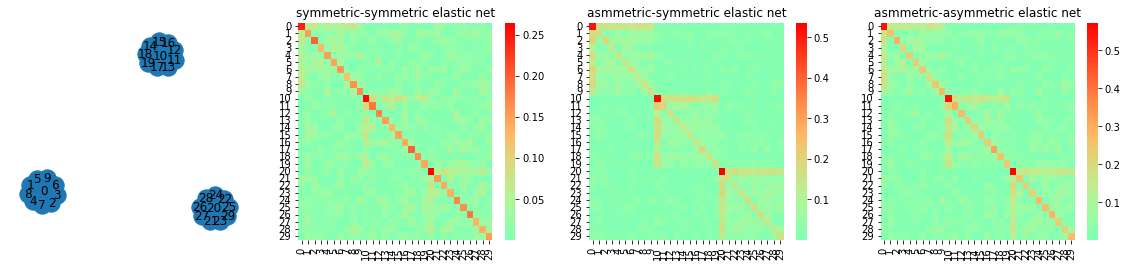

In [37]:
f = plt.figure(figsize=(20,4))
ax0 = f.add_subplot(1, 4, 1)
nx.draw(G, with_labels=True)
# symmetric-symmetric elastic net
sse = ss_El_Estimator(l1=5000, l2=5000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=True)
sse.fit(node_features, maxiter=100)
ax0 = f.add_subplot(1, 4, 2)
sse.heatplot()
ax0.set_title('symmetric-symmetric elastic net')
# asmmetric-symmetric elastic net
ase = as_El_Estimator(l1=5000, l2=5000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=True)
ase.fit(node_features, maxiter=100)
ax1 = f.add_subplot(1, 4, 3)
ase.heatplot()
ax1.set_title('asmmetric-symmetric elastic net')
# asmmetric-asymmetric elastic net
aae = aa_El_Estimator(l1=5000, l2=5000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=True)
aae.fit(node_features, maxiter=100)
ax2 = f.add_subplot(1, 4, 4)
aae.heatplot()
ax2.set_title('asmmetric-asymmetric elastic net')

<AxesSubplot:>

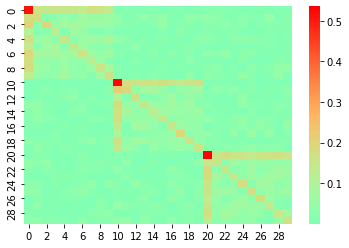

In [42]:
s = np.abs(ase.W.value)
sb.heatmap(s, cmap='rainbow', center=0)

<AxesSubplot:>

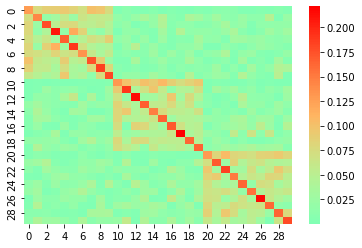

In [41]:
s = scaling(np.abs(ase.W.value))
sb.heatmap(s, cmap='rainbow', center=0)

Text(0.5, 1.0, 'asmmetric-asymmetric elastic net')

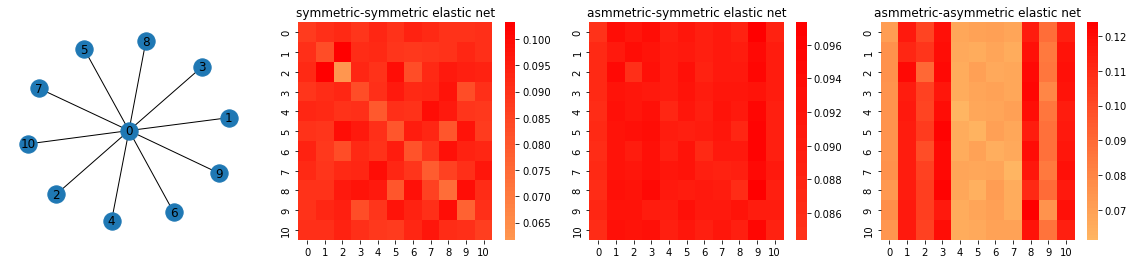

In [ ]:
f = plt.figure(figsize=(20,4))
ax0 = f.add_subplot(1, 4, 1)
nx.draw(G, with_labels=True)
# symmetric-symmetric elastic net
sse = ss_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=True)
sse.fit(node_features, maxiter=500)
ax0 = f.add_subplot(1, 4, 2)
sse.scaling()
ax0.set_title('symmetric-symmetric elastic net')
# asmmetric-symmetric elastic net
ase = as_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=True)
ase.fit(node_features, maxiter=500)
ax1 = f.add_subplot(1, 4, 3)
ase.scaling()
ax1.set_title('asmmetric-symmetric elastic net')
# asmmetric-asymmetric elastic net
aae = aa_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=True)
aae.fit(node_features, maxiter=500)
ax2 = f.add_subplot(1, 4, 4)
aae.scaling()
ax2.set_title('asmmetric-asymmetric elastic net')

### Tree graph

In [ ]:
G = nx.balanced_tree(3,2)
L, D, Gamma = graph_to_mat(G)
group_label = [0] * G.number_of_nodes()
U, latent_features, node_features = sub_clean_feature_generator(group_label, num_features=20, num_latent_features=8)

#### Unnormalized Lap matrix

Text(0.5, 1.0, 'asmmetric-asymmetric elastic net')

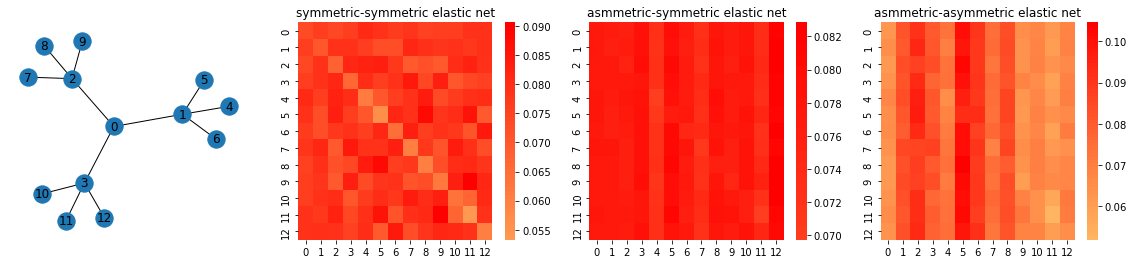

In [ ]:
f = plt.figure(figsize=(20,4))
ax0 = f.add_subplot(1, 4, 1)
nx.draw(G, with_labels=True)
# symmetric-symmetric elastic net
sse = ss_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=False)
sse.fit(node_features, maxiter=500)
ax0 = f.add_subplot(1, 4, 2)
sse.scaling()
ax0.set_title('symmetric-symmetric elastic net')
# asmmetric-symmetric elastic net
ase = as_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=False)
ase.fit(node_features, maxiter=500)
ax1 = f.add_subplot(1, 4, 3)
ase.scaling()
ax1.set_title('asmmetric-symmetric elastic net')
# asmmetric-asymmetric elastic net
aae = aa_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=False)
aae.fit(node_features, maxiter=500)
ax2 = f.add_subplot(1, 4, 4)
aae.scaling()
ax2.set_title('asmmetric-asymmetric elastic net')


#### Normalized Lap matrix

Text(0.5, 1.0, 'asmmetric-asymmetric elastic net')

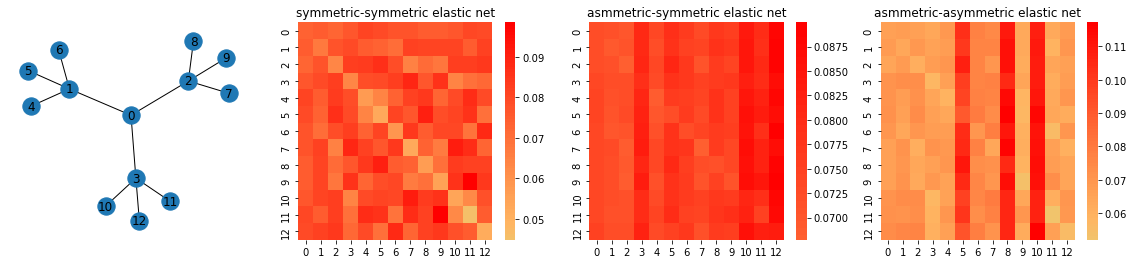

In [ ]:
f = plt.figure(figsize=(20,4))
ax0 = f.add_subplot(1, 4, 1)
nx.draw(G, with_labels=True)
# symmetric-symmetric elastic net
sse = ss_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=True)
sse.fit(node_features, maxiter=500)
ax0 = f.add_subplot(1, 4, 2)
sse.scaling()
ax0.set_title('symmetric-symmetric elastic net')
# asmmetric-symmetric elastic net
ase = as_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=True)
ase.fit(node_features, maxiter=500)
ax1 = f.add_subplot(1, 4, 3)
ase.scaling()
ax1.set_title('asmmetric-symmetric elastic net')
# asmmetric-asymmetric elastic net
aae = aa_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=True)
aae.fit(node_features, maxiter=500)
ax2 = f.add_subplot(1, 4, 4)
aae.scaling()
ax2.set_title('asmmetric-asymmetric elastic net')

### Barbell Graph

In [ ]:
G = nx.barbell_graph(4,3)
L, D, Gamma = graph_to_mat(G)
group_label = [0] * G.number_of_nodes()
U, latent_features, node_features = sub_clean_feature_generator(group_label, num_features=20, num_latent_features=8)

#### Unnormalized Lap matrix

Text(0.5, 1.0, 'asmmetric-asymmetric elastic net')

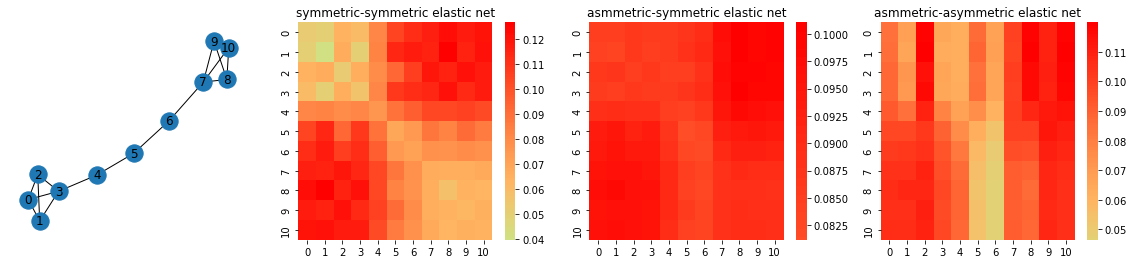

In [ ]:
f = plt.figure(figsize=(20,4))
ax0 = f.add_subplot(1, 4, 1)
nx.draw(G, with_labels=True)
# symmetric-symmetric elastic net
sse = ss_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=False)
sse.fit(node_features, maxiter=500)
ax0 = f.add_subplot(1, 4, 2)
sse.scaling()
ax0.set_title('symmetric-symmetric elastic net')
# asmmetric-symmetric elastic net
ase = as_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=False)
ase.fit(node_features, maxiter=500)
ax1 = f.add_subplot(1, 4, 3)
ase.scaling()
ax1.set_title('asmmetric-symmetric elastic net')
# asmmetric-asymmetric elastic net
aae = aa_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=False)
aae.fit(node_features, maxiter=500)
ax2 = f.add_subplot(1, 4, 4)
aae.scaling()
ax2.set_title('asmmetric-asymmetric elastic net')


#### Normalized Lap matrix

Text(0.5, 1.0, 'asmmetric-asymmetric elastic net')

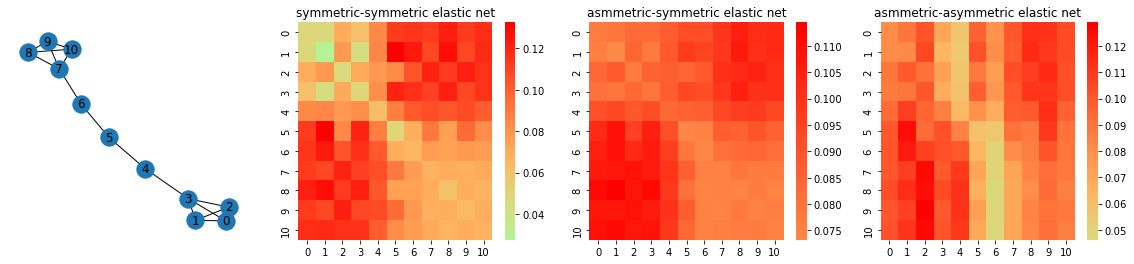

In [ ]:
f = plt.figure(figsize=(20,4))
ax0 = f.add_subplot(1, 4, 1)
nx.draw(G, with_labels=True)
# symmetric-symmetric elastic net
sse = ss_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=True)
sse.fit(node_features, maxiter=500)
ax0 = f.add_subplot(1, 4, 2)
sse.scaling()
ax0.set_title('symmetric-symmetric elastic net')
# asmmetric-symmetric elastic net
ase = as_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=True)
ase.fit(node_features, maxiter=500)
ax1 = f.add_subplot(1, 4, 3)
ase.scaling()
ax1.set_title('asmmetric-symmetric elastic net')
# asmmetric-asymmetric elastic net
aae = aa_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=True)
aae.fit(node_features, maxiter=500)
ax2 = f.add_subplot(1, 4, 4)
aae.scaling()
ax2.set_title('asmmetric-asymmetric elastic net')

### Complete graph

In [ ]:
G = nx.complete_graph(10)
L, D, Gamma = graph_to_mat(G)
group_label = [0] * G.number_of_nodes()
U, latent_features, node_features = sub_clean_feature_generator(group_label, num_features=20, num_latent_features=8)

#### Unnormalized Lap matrix

Text(0.5, 1.0, 'asmmetric-asymmetric elastic net')

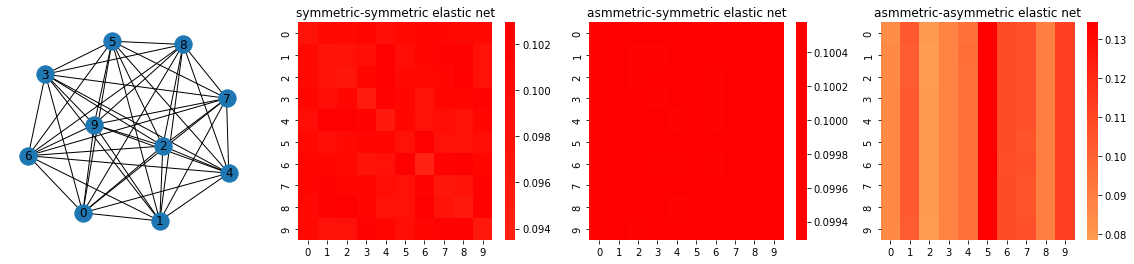

In [ ]:
f = plt.figure(figsize=(20,4))
ax0 = f.add_subplot(1, 4, 1)
nx.draw(G, with_labels=True)
# symmetric-symmetric elastic net
sse = ss_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=False)
sse.fit(node_features, maxiter=500)
ax0 = f.add_subplot(1, 4, 2)
sse.scaling()
ax0.set_title('symmetric-symmetric elastic net')
# asmmetric-symmetric elastic net
ase = as_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=False)
ase.fit(node_features, maxiter=500)
ax1 = f.add_subplot(1, 4, 3)
ase.scaling()
ax1.set_title('asmmetric-symmetric elastic net')
# asmmetric-asymmetric elastic net
aae = aa_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=False)
aae.fit(node_features, maxiter=500)
ax2 = f.add_subplot(1, 4, 4)
aae.scaling()
ax2.set_title('asmmetric-asymmetric elastic net')


#### Normalized Lap matrix

Text(0.5, 1.0, 'asmmetric-asymmetric elastic net')

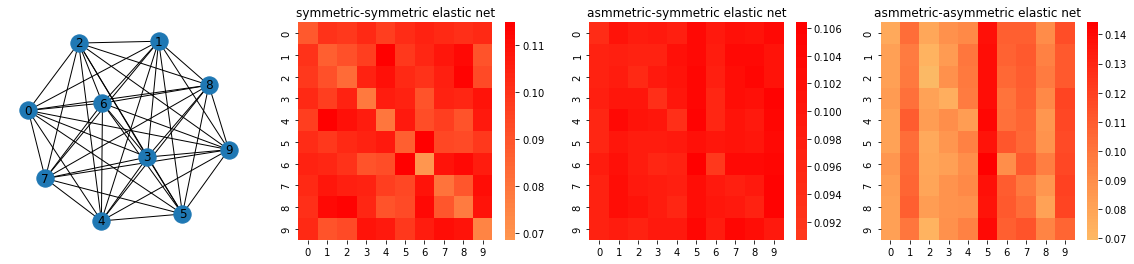

In [ ]:
f = plt.figure(figsize=(20,4))
ax0 = f.add_subplot(1, 4, 1)
nx.draw(G, with_labels=True)
# symmetric-symmetric elastic net
sse = ss_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=True)
sse.fit(node_features, maxiter=500)
ax0 = f.add_subplot(1, 4, 2)
sse.scaling()
ax0.set_title('symmetric-symmetric elastic net')
# asmmetric-symmetric elastic net
ase = as_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=True)
ase.fit(node_features, maxiter=500)
ax1 = f.add_subplot(1, 4, 3)
ase.scaling()
ax1.set_title('asmmetric-symmetric elastic net')
# asmmetric-asymmetric elastic net
aae = aa_El_Estimator(l1=1000, l2=1000, l3=0, Gamma=Gamma, D=D, method='cp', solver='SCS', deg_crct=True)
aae.fit(node_features, maxiter=500)
ax2 = f.add_subplot(1, 4, 4)
aae.scaling()
ax2.set_title('asmmetric-asymmetric elastic net')

### Wheel graph